In [14]:
from enum import unique
import importlib
import xgi
import matplotlib.pyplot as plt
import random
import numpy as np
import itertools
from sklearn.metrics import r2_score

import csv
from tqdm import tqdm
import csv
from numpy import genfromtxt
import matplotlib as mpl
import pandas as pd
import seaborn as sb


#mpl.style.use('report_style.mplstyle')

In [49]:

ps = np.linspace(0.02, 0.2, 10)
betas = np.linspace(0.1, 1, 10)
run_length = 10**3
qs = [1]
ensemble_size=4
social_structures = ['InVS15']#, 'SFHH', 'Thiers13']

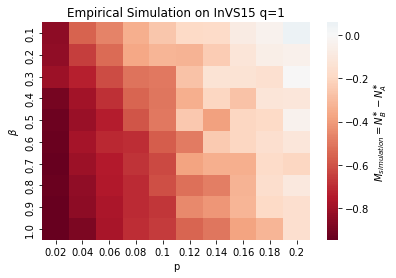

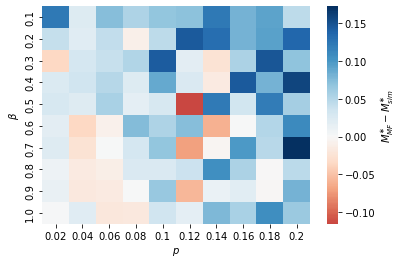

In [26]:
for social_structure in social_structures:
    
    for q in qs:

        fname_A = f'heatmap_int_A_res_{len(betas)}x{len(ps)}_{social_structure}_q={q}_{run_length}'
        data_A = pd.read_csv(f'../mean-field_studies/preacher/numerical_integration/finished_outputs/{fname_A}.csv', index_col=0)

        fname_B = f'heatmap_int_B_res_{len(betas)}x{len(ps)}_{social_structure}_q={q}_{run_length}'
        data_B = pd.read_csv(f'../mean-field_studies/preacher/numerical_integration/finished_outputs/{fname_B}.csv', index_col=0)
        
        fname_A_sim = f'heatmap_A_res_{len(betas)}x{len(ps)}_{social_structure}_{q}_{run_length}_{ensemble_size}'
        data_A_sim = pd.read_csv(f'../higher order ng (adaptive traveling speaker v2)/finished_outputs/{fname_A_sim}.csv', index_col=0)

        fname_B_sim = f'heatmap_B_res_{len(betas)}x{len(ps)}_{social_structure}_{q}_{run_length}_{ensemble_size}'
        data_B_sim = pd.read_csv(f'../higher order ng (adaptive traveling speaker v2)/finished_outputs/{fname_B_sim}.csv', index_col=0)
        
        #print(data_B_sim.head())
#         data_B.drop(columns = ['0.0'], inplace=True)
#         data_A.drop(columns = ['0.0'], inplace=True)
        

        
#         colormap = sb.color_palette(palette="RdBu", n_colors=None, desat=None, as_cmap=True)
#         sb.heatmap(data_B-data_A, cbar_kws={'label':r'$M_{MF} = N_{B}^{\ast}-N_{A}^{\ast}$'}, cmap=colormap, center=0)
#         plt.title(f'Mean Field on {social_structure} q={q}')
#         plt.xlabel('p')
#         plt.ylabel(r'$\beta$')
#         plt.savefig(f'figures/heatmap_int_res_{len(ps)}x{len(betas)}_{social_structure}_{q}_{run_length}.pdf')
#         plt.show()
        
        colormap = sb.color_palette(palette="RdBu", n_colors=None, desat=None, as_cmap=True)
        sb.heatmap(data_B_sim-data_A_sim, cbar_kws={'label':r'$M_{simulation} = N_{B}^{\ast}-N_{A}^{\ast}$'}, cmap=colormap, center=0)
        plt.title(f'Empirical Simulation on {social_structure} q={q}')
        plt.xlabel('p')
        plt.ylabel(r'$\beta$')
        plt.savefig(f'figures/heatmap_sim_res_{len(ps)}x{len(betas)}_{social_structure}_{q}_{run_length}.pdf')
        plt.show()
        
        M_sim = data_B_sim - data_A_sim
        M_MF = data_B - data_A

        # difference heatmap
        colormap = sb.color_palette(palette="RdBu", n_colors=None, desat=None, as_cmap=True)
        sb.heatmap(M_MF-M_sim, cbar_kws={'label':r'$M_{MF}^{\ast}-M_{sim}^{\ast}$'}, cmap=colormap, center=0)
        #plt.title(f'Error in steady state prediction on {social_structure} q={q}')
        plt.xlabel(r'$p$')
        plt.ylabel(r'$\beta$')
        plt.savefig(f'figures/heatmap_difference_res_{len(ps)}x{len(betas)}_{social_structure}_{q}_{run_length}.pdf', bbox_inches='tight')
        plt.show()
        
        

InVS15_0.02_0.1_0.1_q=1_1000
InVS15_0.02_0.1_0.1_q=1_1000_4
loaded data
[[209. 209. 209. ... 181. 181. 181.]
 [  4.   4.   4. ...   8.   8.   8.]
 [  0.   0.   0. ...  24.  24.  24.]
 ...
 [209. 209. 209. ... 191. 191. 191.]
 [  4.   4.   4. ...   4.   4.   4.]
 [  0.   0.   0. ...  18.  18.  18.]]
(12, 1001)
1001


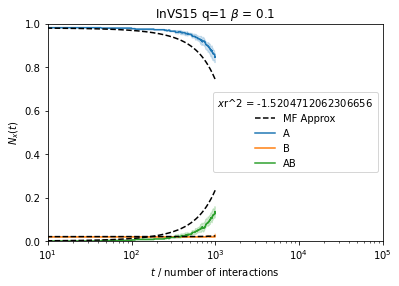

InVS15_0.02_0.2_0.2_q=1_1000
InVS15_0.02_0.2_0.2_q=1_1000_4
loaded data
[[209. 209. 209. ... 154. 154. 154.]
 [  4.   4.   4. ...   5.   5.   5.]
 [  0.   0.   0. ...  54.  54.  54.]
 ...
 [209. 209. 209. ... 187. 187. 187.]
 [  4.   4.   4. ...   5.   5.   5.]
 [  0.   0.   0. ...  21.  21.  21.]]
(12, 1001)
1001


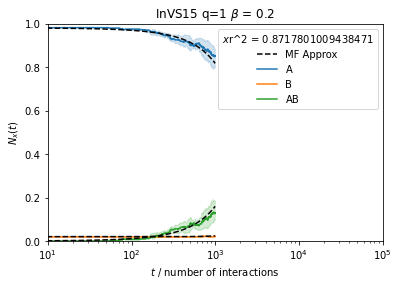

InVS15_0.02_0.3_0.3_q=1_1000
InVS15_0.02_0.3_0.3_q=1_1000_4
loaded data
[[209. 209. 209. ... 178. 178. 177.]
 [  4.   4.   4. ...   6.   8.   8.]
 [  0.   0.   0. ...  29.  27.  28.]
 ...
 [209. 209. 209. ... 175. 175. 175.]
 [  4.   4.   4. ...   6.   6.   6.]
 [  0.   0.   0. ...  32.  32.  32.]]
(12, 1001)
1001


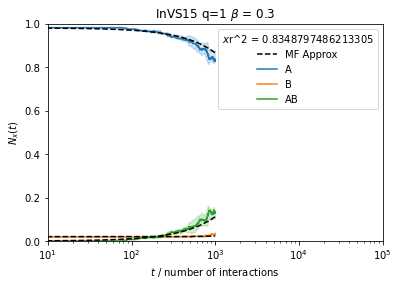

InVS15_0.02_0.4_0.4_q=1_1000
InVS15_0.02_0.4_0.4_q=1_1000_4
loaded data
[[209. 209. 209. ... 193. 193. 193.]
 [  4.   4.   4. ...   4.   4.   4.]
 [  0.   0.   0. ...  16.  16.  16.]
 ...
 [209. 209. 209. ... 198. 198. 198.]
 [  4.   4.   4. ...   4.   4.   4.]
 [  0.   0.   0. ...  11.  11.  11.]]
(12, 1001)
1001


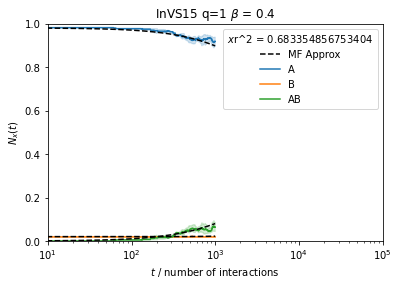

InVS15_0.02_0.5_0.5_q=1_1000
InVS15_0.02_0.5_0.5_q=1_1000_4
loaded data
[[209. 209. 209. ... 203. 203. 203.]
 [  4.   4.   4. ...   4.   4.   4.]
 [  0.   0.   0. ...   6.   6.   6.]
 ...
 [209. 209. 208. ... 200. 200. 200.]
 [  4.   4.   4. ...   5.   5.   5.]
 [  0.   0.   1. ...   8.   8.   8.]]
(12, 1001)
1001


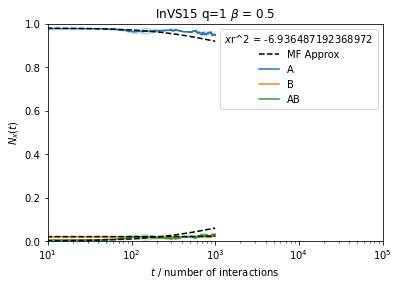

InVS15_0.02_0.6_0.6_q=1_1000
InVS15_0.02_0.6_0.6_q=1_1000_4
loaded data
[[209. 209. 209. ... 200. 200. 200.]
 [  4.   4.   4. ...   4.   4.   4.]
 [  0.   0.   0. ...   9.   9.   9.]
 ...
 [209. 209. 209. ... 203. 203. 203.]
 [  4.   4.   4. ...   5.   5.   5.]
 [  0.   0.   0. ...   5.   5.   5.]]
(12, 1001)
1001


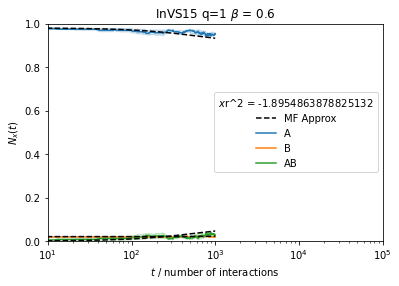

InVS15_0.02_0.7_0.7_q=1_1000
InVS15_0.02_0.7_0.7_q=1_1000_4
loaded data
[[209. 209. 209. ... 204. 204. 204.]
 [  4.   4.   4. ...   4.   4.   4.]
 [  0.   0.   0. ...   5.   5.   5.]
 ...
 [209. 209. 209. ... 200. 200. 200.]
 [  4.   4.   4. ...   5.   5.   5.]
 [  0.   0.   0. ...   8.   8.   8.]]
(12, 1001)
1001


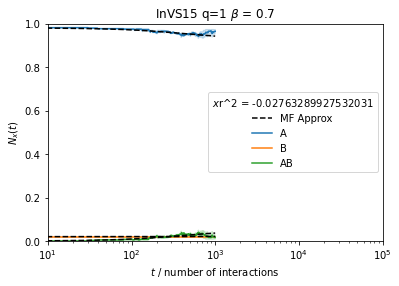

InVS15_0.02_0.8_0.8_q=1_1000
InVS15_0.02_0.8_0.8_q=1_1000_4
loaded data
[[209. 209. 209. ... 201. 201. 201.]
 [  4.   4.   4. ...   4.   4.   4.]
 [  0.   0.   0. ...   8.   8.   8.]
 ...
 [209. 209. 209. ... 203. 203. 203.]
 [  4.   4.   4. ...   6.   6.   6.]
 [  0.   0.   0. ...   4.   4.   4.]]
(12, 1001)
1001


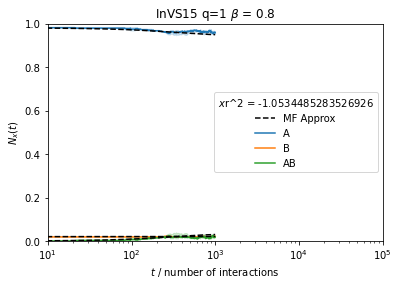

InVS15_0.02_0.9_0.9_q=1_1000
InVS15_0.02_0.9_0.9_q=1_1000_4
loaded data
[[209. 209. 209. ... 205. 205. 205.]
 [  4.   4.   4. ...   4.   4.   4.]
 [  0.   0.   0. ...   4.   4.   4.]
 ...
 [209. 209. 209. ... 207. 207. 207.]
 [  4.   4.   4. ...   4.   4.   4.]
 [  0.   0.   0. ...   2.   2.   2.]]
(12, 1001)
1001


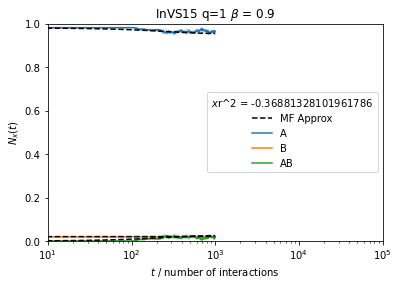

InVS15_0.02_1.0_1.0_q=1_1000
InVS15_0.02_1.0_1.0_q=1_1000_4
loaded data
[[209. 209. 209. ... 205. 205. 205.]
 [  4.   4.   4. ...   4.   4.   4.]
 [  0.   0.   0. ...   4.   4.   4.]
 ...
 [209. 209. 209. ... 204. 204. 204.]
 [  4.   4.   4. ...   4.   4.   4.]
 [  0.   0.   0. ...   5.   5.   5.]]
(12, 1001)
1001


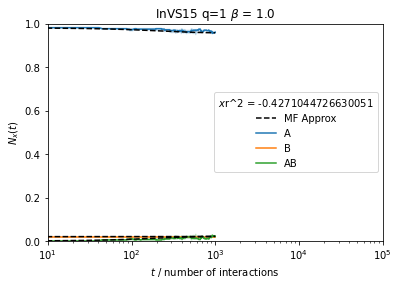

In [45]:
for social_structure in social_structures:
    
    for q in qs:
         for beta in betas:
                for p in ps[:1]:
                    beta = round(beta, 2)
                    p = round(p,2)
                    fname = f'{social_structure}_{p}_{beta}_{beta}_q={q}_{run_length}'
                    data = pd.read_csv(f'../mean-field_studies/preacher/numerical_integration/outputs/{fname}.csv', index_col=0)

                    print(fname)
        
                    #print(data.head())
       
                    
                    plt.figure()
                    plt.plot(data.index.values, data['f_A'], color='black', linestyle='--', zorder=10)
                    plt.plot(data.index.values, data['f_B'], color='black', linestyle='--', zorder=10)
                    plt.plot(data.index.values, data['f_AB'], color='black', linestyle='--', label='MF Approx', zorder=10)
                    plt.legend()
                    plt.xscale('log')
                    #print(data)

                    f_A_pred = data['f_A']
                    f_B_pred = data['f_B']
                    f_AB_pred = data['f_AB']
                    
                    
                
                    fname = f'{social_structure}_{p}_{beta}_{beta}_q={q}_{run_length}_{ensemble_size}' 
                    print(fname)
                    data = genfromtxt(f'../higher order ng (adaptive traveling speaker v2)/outputs/{fname}.csv', delimiter=',')

                    print('loaded data')
                    print(data)
                    print(data.shape)
                    A_data = data[0::3,::]
                    B_data = data[1::3,::]
                    AB_data = data[2::3,::]

                    N = A_data[0,0]+B_data[0,0]+AB_data[0,0]

                    A_data = A_data/N
                    B_data = B_data/N
                    AB_data = AB_data/N
                    
                    A_data_av = np.median(A_data, axis=0)
                    print(len(A_data_av))
                    A_data_25 = np.percentile(A_data, 25, axis=0)
                    A_data_75 = np.percentile(A_data, 75, axis=0)
                    B_data_av = np.median(B_data, axis=0)
                    B_data_25 = np.percentile(B_data, 25, axis=0)
                    B_data_75 = np.percentile(B_data, 75, axis=0)
                    AB_data_av = np.median(AB_data, axis=0)
                    AB_data_25 = np.percentile(AB_data, 25, axis=0)
                    AB_data_75 = np.percentile(AB_data, 75, axis=0)

                    t = np.linspace(0, run_length, num=(run_length)+1, endpoint=True)

                    
                    plt.plot(t, A_data_av, color='tab:blue', label=r'A')
                    plt.fill_between(t, y1=A_data_25, y2=A_data_75, color='tab:blue', alpha=0.2)
                    plt.plot(t, B_data_av, color='tab:orange', label=r'B')
                    plt.fill_between(t, y1=B_data_25, y2=B_data_75, color='tab:orange', alpha=0.2)
                    plt.plot(t, AB_data_av, color='tab:green', label=r'AB')
                    plt.fill_between(t, y1=AB_data_25, y2=AB_data_75, color='tab:green', alpha=0.2)
                    
                    #plt.title(r'$\beta$' + f' = {beta_non_committed} and q={q}')
                    plt.title(f'{social_structure} q={q} '+r'$\beta$ = '+f'{beta}')
                    plt.xlabel('$t$ / number of interactions')
                    plt.ylabel(r'$N_{x}(t)$')
                    plt.legend(title=r'$x$'+f'r^2 = {r2_score(A_data_av[:-1], f_A_pred)}')
                    plt.xlim((10,10**5))
                    plt.ylim((0,1))
                    plt.savefig(f'figures/Comparison_{fname}_logtime.pdf')
                    plt.show()

# Comparison of edge size distribution

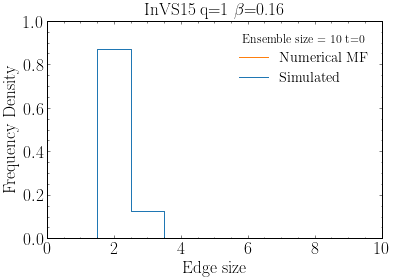

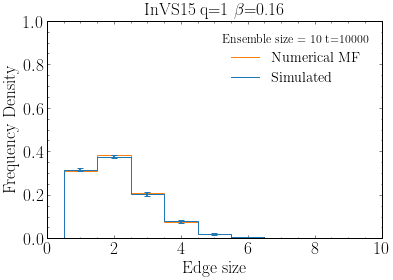

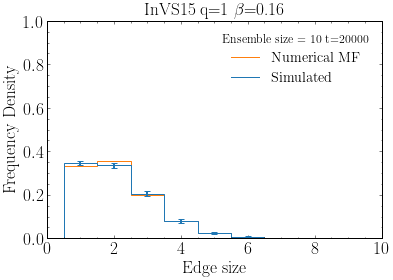

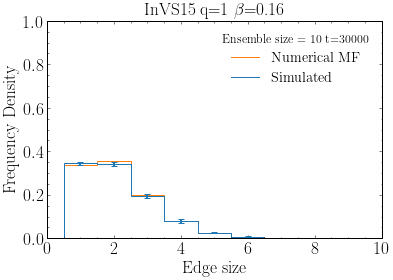

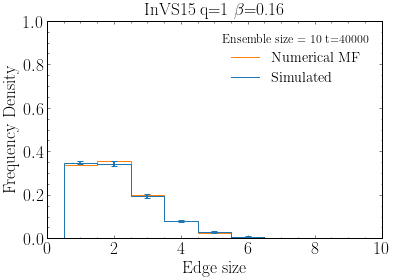

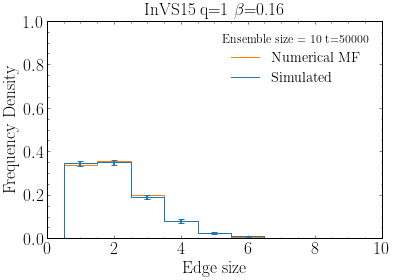

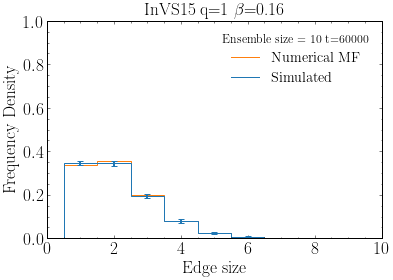

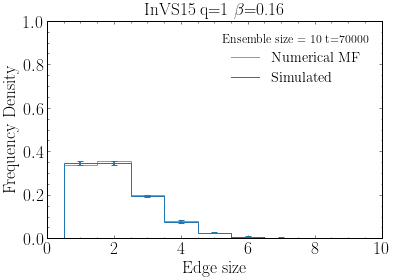

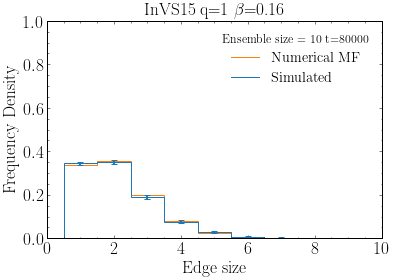

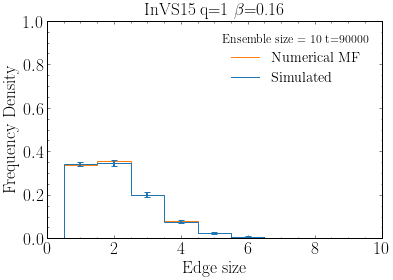

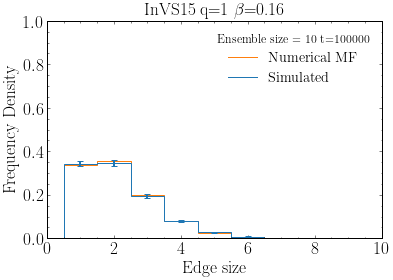

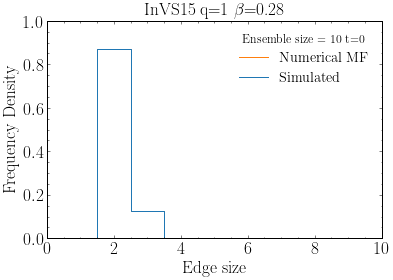

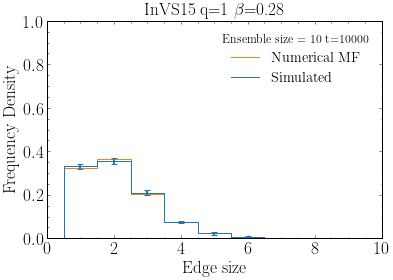

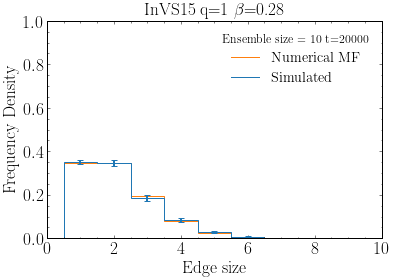

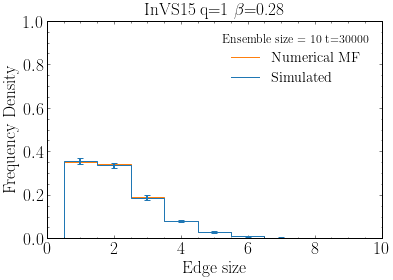

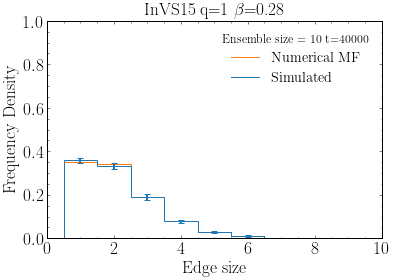

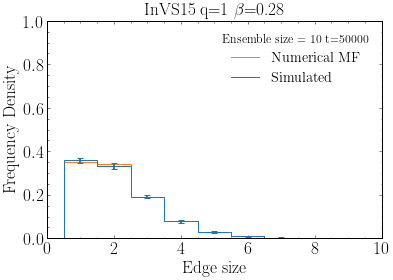

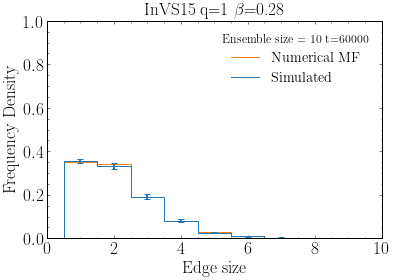

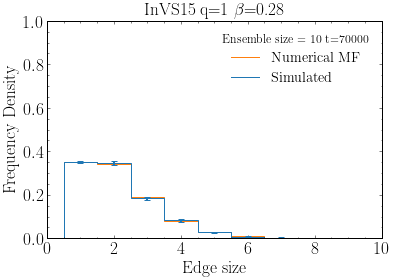

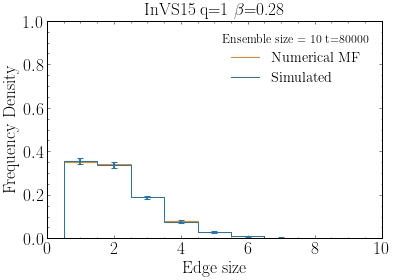

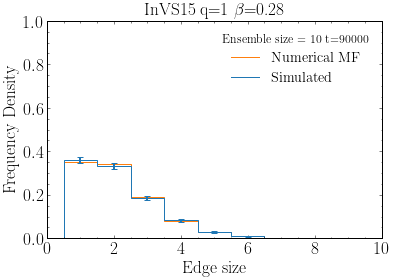

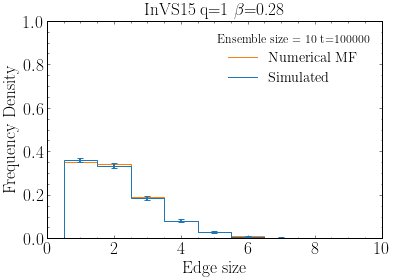

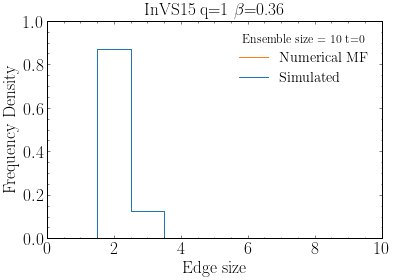

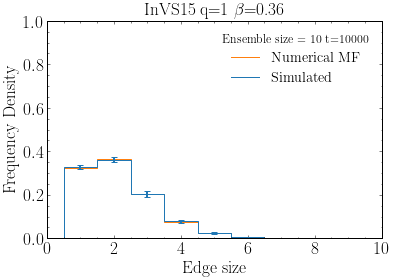

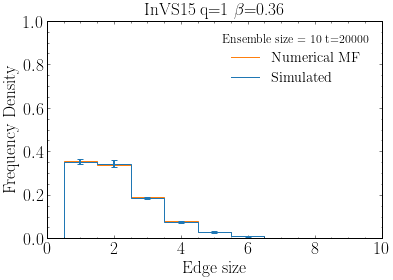

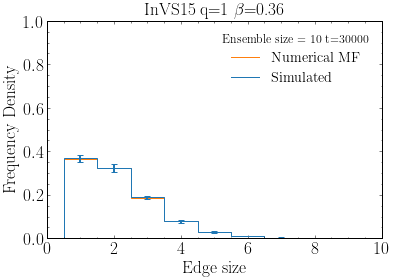

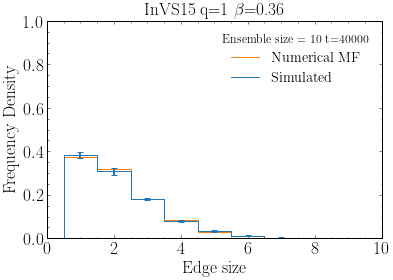

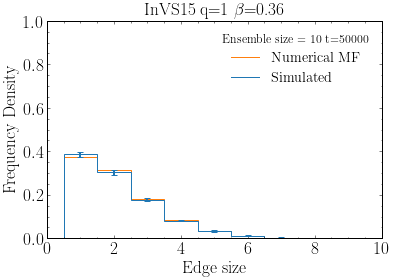

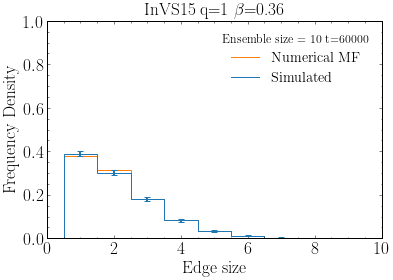

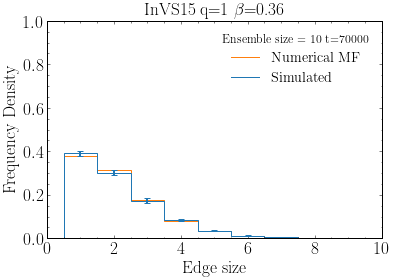

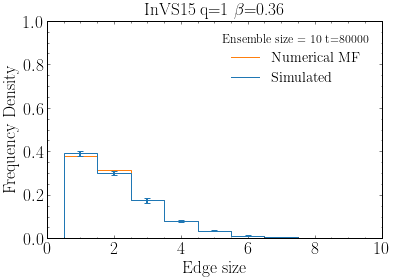

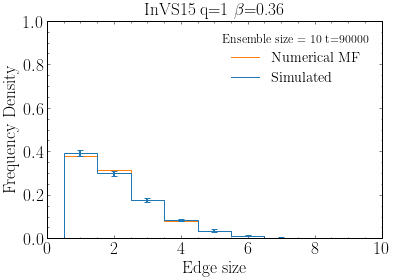

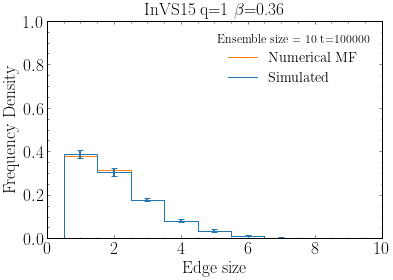

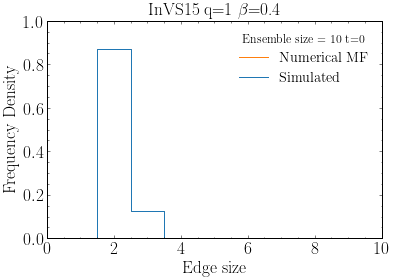

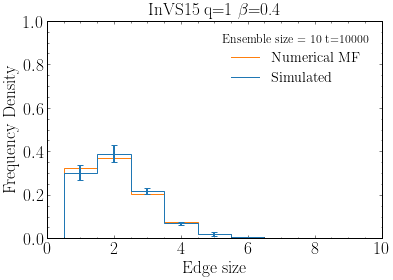

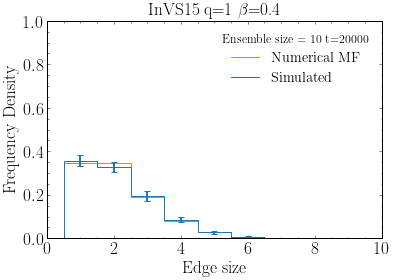

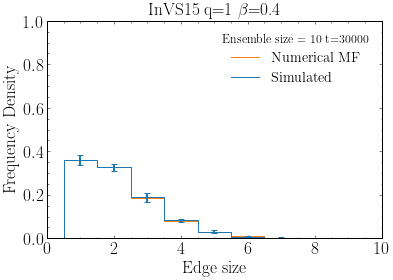

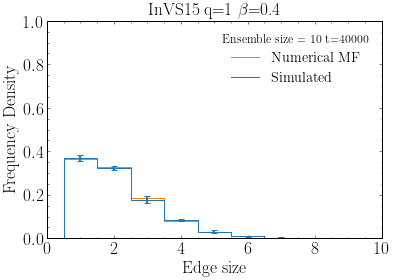

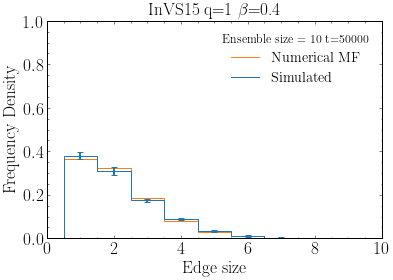

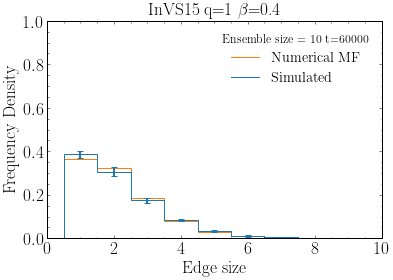

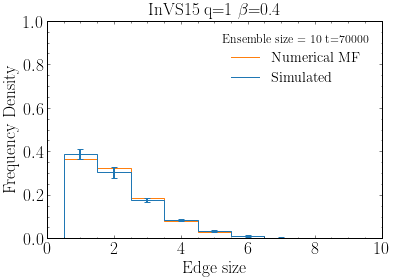

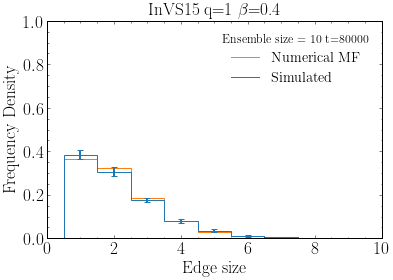

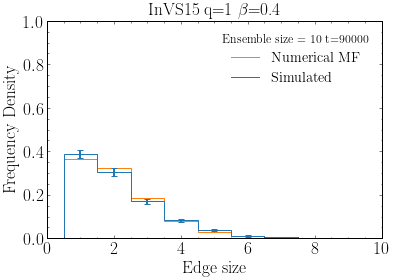

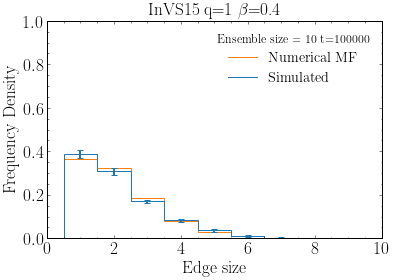

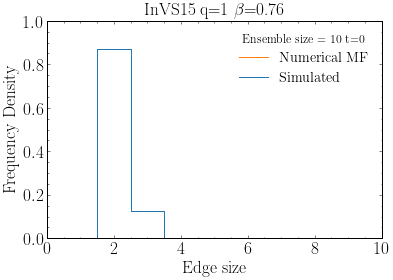

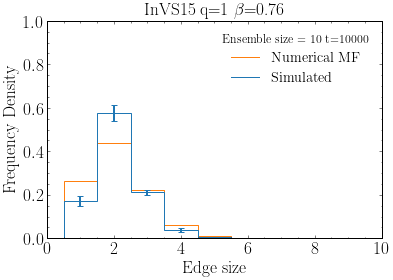

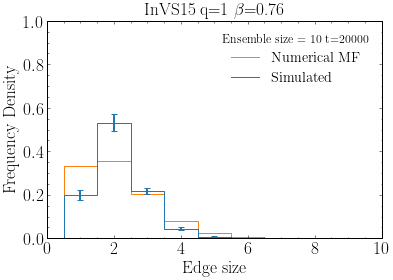

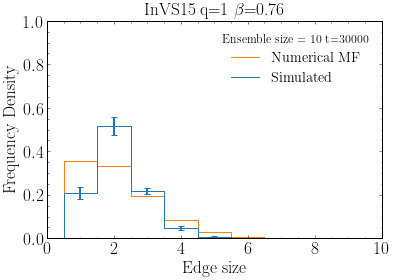

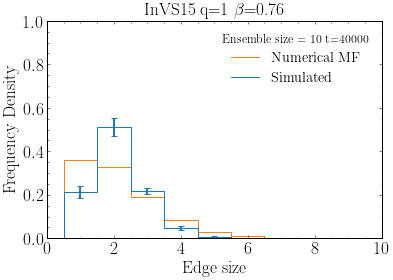

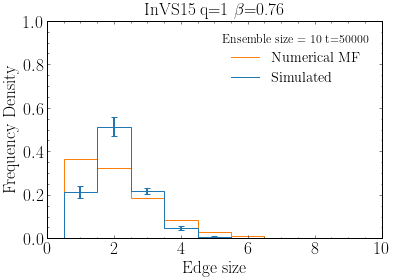

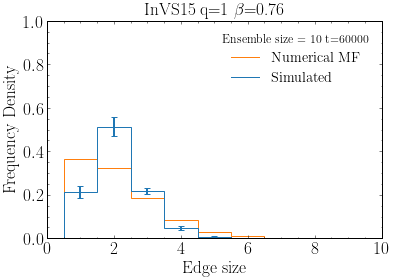

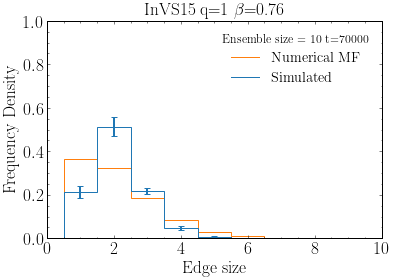

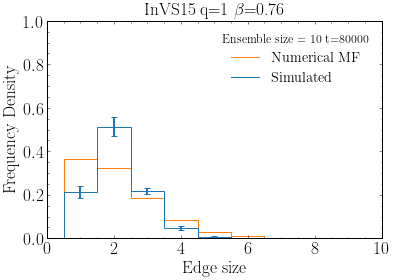

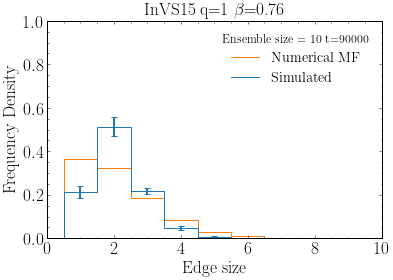

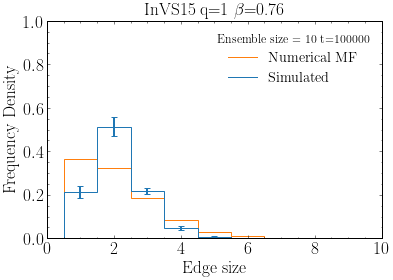

In [23]:
time = np.linspace(0, run_length,11, endpoint = True, dtype = int)

time[-1] = time[-1] -1
for social_structure in social_structures:
    for q in qs:
         for beta in betas:
                for p in ps:
                    
                    int_fname = f'edge_pdf_{social_structure}_{p}_{beta}_{beta}_q={q}_{run_length}'
                    data_int = pd.read_csv(f'../mean-field_studies/preacher/numerical_integration/outputs/{int_fname}.csv', index_col = 0 )

                    sim_fname = f'sim_edge_pdf_{social_structure}_{p}_{beta}_{beta}_q={q}_{run_length}_{ensemble_size}'
                    data_sim = pd.read_csv(f'../higher order ng (adaptive traveling speaker v2)/aux_outputs/{sim_fname}.csv', index_col = 0)
                    err_sim_fname = f'sim_edge_std_{social_structure}_{p}_{beta}_{beta}_q={q}_{run_length}_{ensemble_size}'
                    data_err_sim = pd.read_csv(f'../higher order ng (adaptive traveling speaker v2)/aux_outputs/{err_sim_fname}.csv', index_col = 0)
#                     print(data_int.index.values)
#                     print(data_sim.index.values)
                    bin_edges = np.linspace(0.5, 213+0.5, num = 213+1, endpoint = True)
                    #print(bin_edges)
                    #print(data_int.index.values[-1])
                    for t in time:
                        plt.stairs(data_int[f'{t}'], edges=bin_edges, color='tab:orange', label='Numerical MF')
                        #plt.errorbar(same_bin_centres, mean_initial_size_binned_freq, yerr=std_initial_size_binned_freq/np.sqrt(ensemble_size), linestyle='None', color='tab:orange', capsize=3)
                        plt.stairs(data_sim[f'{t}'], edges=bin_edges,color='tab:blue', label='Simulated')
                        plt.errorbar(data_err_sim.index.values, data_sim[f'{t}'], yerr=data_err_sim[f'{t}'], linestyle='None', color='tab:blue', capsize=3)
                        if t == time[-1]:
                            t = t+1
                        plt.legend(title = f'Ensemble size = {ensemble_size} t={t}')
                        plt.xlim((0, 10))
                        plt.ylim((0, 1))
                        plt.xlabel('Edge size')
                        plt.ylabel('Frequency Density')
                        plt.title(f'{social_structure} q={q} '+r'$\beta$='+f'{beta}')
                        plt.savefig(f'figures/combined_edge_size_{int_fname}_t={t}.pdf')
                        plt.show()
                        

                        
                        

# Create R^2 CSVs

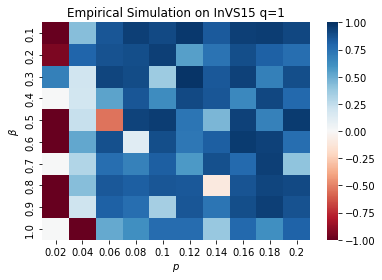

In [55]:

def create_r2_csvs_from_outputs(prop_committed, betas, ensemble_size, run_length, social_structures, qs):
    r2 = np.zeros((len(betas), len(prop_committed)))

    for social_structure in social_structures:
        for q in qs:
            for i, p in enumerate(prop_committed):
                for j, b in enumerate(betas):
                    p = round(p, 2)
                    b = round(b, 2)
                    prop_committed[i] = p
                    betas[j] = b


                    mf_fname = f'{social_structure}_{p}_{b}_{b}_q={q}_{run_length}'
                    data_mf = pd.read_csv(f'../mean-field_studies/preacher/numerical_integration/outputs/{mf_fname}.csv', index_col=0)
                    
                    f_A_pred = data_mf['f_A'].to_numpy()
                    f_B_pred = data_mf['f_B'].to_numpy()
                    f_AB_pred = data_mf['f_AB'].to_numpy()

                    sim_fname = f'{social_structure}_{p}_{b}_{b}_q={q}_{run_length}_{ensemble_size}' 
                    #print(fname)
                    sim_data = genfromtxt(f'../higher order ng (adaptive traveling speaker v2)/outputs/{sim_fname}.csv', delimiter=',')

                    #print('loaded data')
                    #print(data)
                    #print(data.shape)
                    A_data = sim_data[0::3,::]
                    B_data = sim_data[1::3,::]
                    AB_data = sim_data[2::3,::]

                    N = A_data[0,0]+B_data[0,0]+AB_data[0,0]

                    A_data = A_data/N
                    B_data = B_data/N
                    AB_data = AB_data/N


                    A_data_av = np.median(A_data, axis=0)
                    B_data_av = np.median(B_data, axis=0)
                    AB_data_av = np.median(AB_data, axis=0)

                    A_r2 = r2_score(A_data_av[:-1], f_A_pred)
                    # print(A_data_av[1:50])
                    # print(f_A_pred[:50])
                    #print(A_r2)
                    B_r2 = r2_score(B_data_av[:-1], f_B_pred)
                    #print(B_r2)
                    AB_r2 = r2_score(AB_data_av[:-1], f_AB_pred)
                    #print(AB_r2)

                    av_r2 = np.mean([A_r2, B_r2, AB_r2])
                    if av_r2 < -20:
                        av_r2 = 0

                    r2[j,i] = av_r2
                    

            fname = f'{len(prop_committed)}x{len(betas)}_{social_structure}_q={q}_{run_length}_{ensemble_size}'
            df = pd.DataFrame(r2, index = betas, columns = prop_committed)
            df.to_csv(f'finished_outputs/heatmap_r2_res_{fname}.csv')

create_r2_csvs_from_outputs(ps, betas, ensemble_size, run_length, social_structures, qs)

for social_structure in social_structures:
    
    for q in qs:

        fname_r2 = f'heatmap_r2_res_{len(ps)}x{len(betas)}_{social_structure}_q={q}_{run_length}_{ensemble_size}'
        data_r2 = pd.read_csv(f'finished_outputs/{fname_r2}.csv', index_col=0)

        colormap = sb.color_palette(palette="RdBu", n_colors=None, desat=None, as_cmap=True)
        sb.heatmap(data_r2, cbar_kws={'label':r''}, cmap=colormap, center=0, vmin=-1, vmax=1)
        plt.xlabel(r'$p$')
        plt.ylabel(r'$\beta$')
        plt.savefig(f'figures/heatmap_r2_res_{len(ps)}x{len(betas)}_{social_structure}_q={q}_{run_length}.pdf', bbox_inches='tight')
        plt.show()


